In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow_probability.substrates import numpy as tfp
from cmdstanpy import CmdStanModel, set_cmdstan_path
import arviz as az
import pickle

In [3]:
with open("model_120.pkl", "rb") as f:
    data_dict = pickle.load(f)
fit120= data_dict['fit']
with open("model_180.pkl", "rb") as f:
    data_dict = pickle.load(f)
fit180 = data_dict['fit']

In [ ]:
az.summary(p180)

In [24]:
p180 = az.from_cmdstanpy(fit180)
p120 = az.from_cmdstanpy(fit120)

In [35]:
# p120.rename_vars({'beta':'Intercept'}, inplace = True)

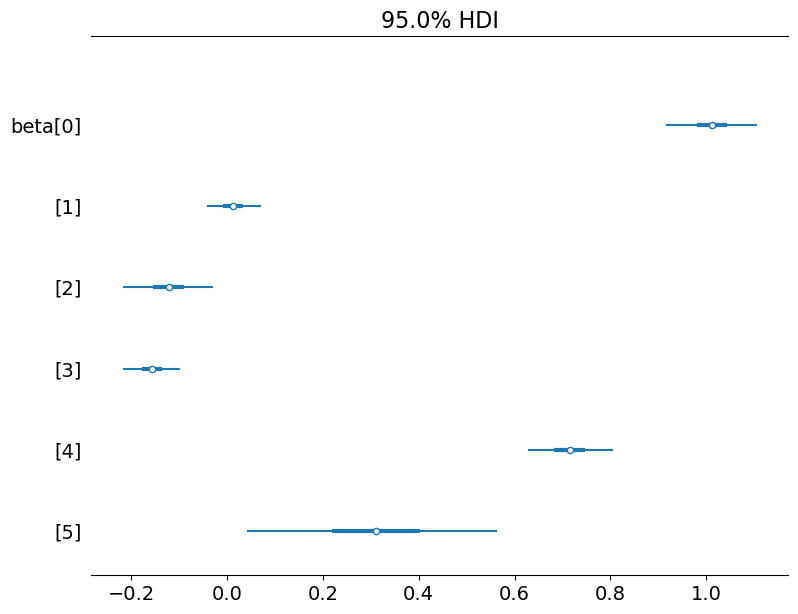

In [29]:
axes = az.plot_forest(p180,
                           kind='forestplot',
                           var_names=["^beta"],
                           filter_vars="regex",
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)

In [ ]:
axes = az.plot_forest(p120,
                           kind='forestplot',
                           var_names=["beta"],
                           filter_vars="regex",
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)

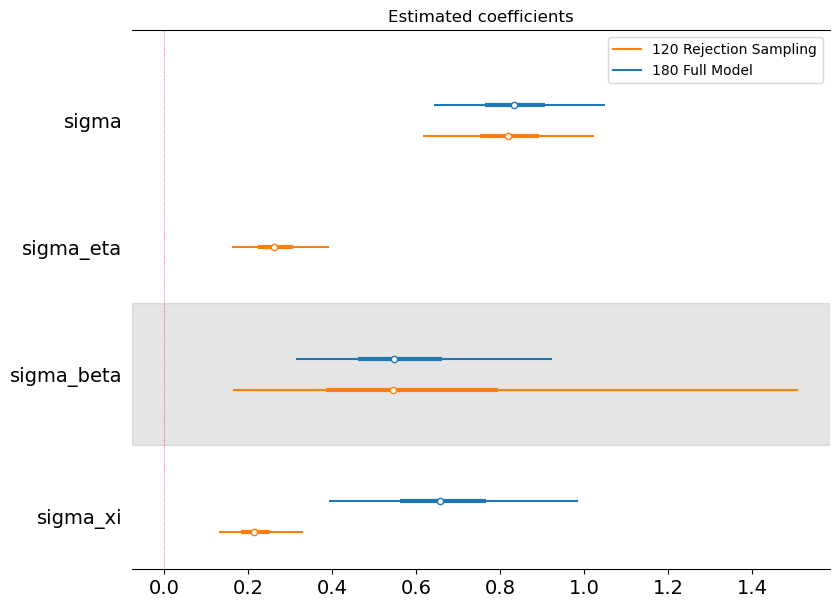

In [40]:
axes = az.plot_forest([fit180, fit120],
                           model_names = ["180 Full Model", "120 Rejection Sampling"],
                           kind='forestplot',
                           var_names=["^sigma"],
                           filter_vars="regex",
                           combined=True,
                           figsize=(9, 7),
                           hdi_prob = .95)
axes[0].set_title('Estimated coefficients')
plt.axvline(x=0, color='r', linestyle=':', linewidth=.5)
plt.show()